In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [10]:
!unzip /content/climate-change-earth-surface-temperature-data.zip
data = pd.read_csv('/content/GlobalLandTemperaturesByMajorCity.csv')

Archive:  /content/climate-change-earth-surface-temperature-data.zip
replace GlobalLandTemperaturesByCity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GlobalLandTemperaturesByCountry.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GlobalLandTemperaturesByMajorCity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GlobalLandTemperaturesByState.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GlobalTemperatures.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [11]:
city_data = data[data['City'] == 'London'][['dt', 'AverageTemperature']]
city_data['dt'] = pd.to_datetime(city_data['dt'])
city_data = city_data.set_index('dt')
city_data = city_data.dropna()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(city_data)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0464
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0049
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0049
Epoch 15/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0046
Epoch 16/20
79/79 ━━━━━━━━━━━━

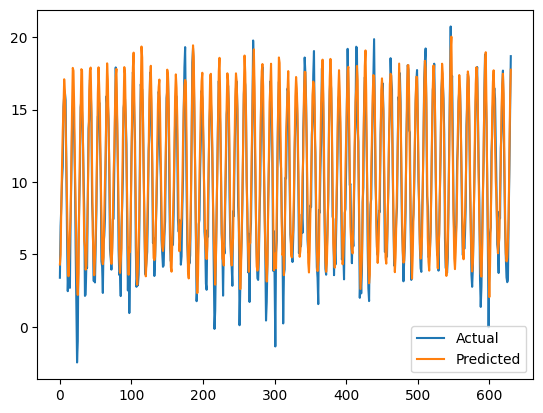

In [13]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

model = Sequential()
model.add(SimpleRNN(32, input_shape=(seq_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

y_pred = model.predict(X_test)

y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

mse = np.mean(np.square(y_test - y_pred))
print('Mean Squared Error:', mse)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
